In [26]:
%load_ext autoreload
%autoreload 2

import numpy as np
import rescomp

import matplotlib.pyplot as plt
import os

# new imports:
from rescomp.alternative_tests import simulation_tests as simt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Conduct experiment:
- compare divergence
- compare Largest LE qr
- compare divergence trajectory of qr algorithm

## Parameters used for divergence and LLE qr:

In [27]:
prepath = "C:/Users\Dennis\Documents\FILES&INFO\WISSEN\STUDIUM\Master LMU\Masterthesis\LyapunovExponentsSimulations"
exp_name_both = "L_31_01_2022"

In [28]:
# create the "create_sim_func" func:
def create_sim_func(parameters):
    sim = parameters["sim"]
    if sim == "modlorenz":
        sys_flag = "mod_lorenz"
    elif sim == "lorenz":
        sys_flag = "lorenz"
    def data_creation_function(time_steps, dt, starting_point):
        return rescomp.simulations.simulate_trajectory(sys_flag, dt, time_steps, starting_point)
    
    return data_creation_function
    
# create the "create_sp_func" starting point func:
def create_sp_func(parameters, Nens):
    seed = parameters["seed"]
    scale = parameters["scale"]
    randmode = parameters["randmode"]
    np.random.seed(seed)
    if randmode == "normal":
        starting_points = np.random.randn(Nens, 3)
    elif randmode == "uniform":
        starting_points = np.random.uniform(size=(Nens, 3)) - 0.5
    return starting_points*scale

create_sim_func_keys = ["sim"]
create_sp_func_keys = ["seed", "scale", "randmode"]

## Exp1: Compare Divergence:

In [29]:
# create the parameter dict to define the experiment:
parameter_dict = {
    "sim": ["lorenz"],
    "seed": 31,
    "scale": [3 ],
    "randmode": ["uniform"],
    
    "dt": [0.01],
    "tau": 100,
    "T": 20, 
    
    "eps": [1e-2, 1e-10]
}

# define Ndims and Nens
Ndims = 3
Nens = 15

# define saving:
save = True

div_name = "_div1"
exp_name_div = exp_name_both + div_name

# other parameters:
get_info = True

out_div = simt.compare_simulations_div(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name_div, Nens=Nens, Ndims=Ndims
                         , get_info=get_info)

--------------------
create_sim_func_keys ['sim']
create_sp_func_keys ['seed', 'scale', 'randmode']
--------------------
--------------------
PARAMETERS: 
sim lorenz
seed 31
scale 3
randmode uniform
dt 0.01
tau 100
T 20
eps [0.01, 1e-10]
--------------------
STARTING CALCULATIONS (2): 
....
CALC: 1/2
{'sim': 'lorenz', 'seed': 31, 'scale': 3, 'randmode': 'uniform'}, dt: 0.01, tau: 100, T: 20, eps: 0.01
N_ens: 1/15
timestep 2000/2000
N_ens: 2/15
timestep 2000/2000
N_ens: 3/15
timestep 2000/2000
N_ens: 4/15
timestep 2000/2000
N_ens: 5/15
timestep 2000/2000
N_ens: 6/15
timestep 2000/2000
N_ens: 7/15
timestep 2000/2000
N_ens: 8/15
timestep 2000/2000
N_ens: 9/15
timestep 2000/2000
N_ens: 10/15
timestep 2000/2000
N_ens: 11/15
timestep 2000/2000
N_ens: 12/15
timestep 2000/2000
N_ens: 13/15
timestep 2000/2000
N_ens: 14/15
timestep 2000/2000
N_ens: 15/15
timestep 2000/2000
....
CALC: 2/2
{'sim': 'lorenz', 'seed': 31, 'scale': 3, 'randmode': 'uniform'}, dt: 0.01, tau: 100, T: 20, eps: 1e-10
N_ens

## Exp2: LLE qr and trajectory divergence:

In [30]:
# create the parameter dict to define the experiment:
parameter_dict = {
    "sim": ["lorenz"],
    "seed": 31,
    "scale": [3 ],
    "randmode": ["uniform"],
    
    "dt": [0.01],
    "tau": 100,
    "T": [1, 2, 5], 
    
    "eps": [1e-2, 1e-10], 
    "Nqr": 10,
}

# define Nle and Nens
Nle = 1
Nens = 15

# return trajectory div:
traj_div=True

# define saving:
save = True
qr_name = "qr1"
exp_name_qr = exp_name_both + qr_name

# other parameters:
get_info = True

out_qr = simt.compare_simulations_leqr(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name_qr, Nens=Nens, Nle=Nle
                    , get_info=get_info, traj_div=True)

--------------------
create_sim_func_keys ['sim']
create_sp_func_keys ['seed', 'scale', 'randmode']
--------------------
--------------------
PARAMETERS: 
sim lorenz
seed 31
scale 3
randmode uniform
dt 0.01
tau 100
T [1, 2, 5]
eps [0.01, 1e-10]
Nqr 10
--------------------
STARTING CALCULATIONS (6): 
....
CALC: 1/6
{'sim': 'lorenz', 'seed': 31, 'scale': 3, 'randmode': 'uniform'}, dt: 0.01, tau: 100, T: 1, eps: 0.01, Nqr: 10
N_ens: 1/15
N_ens: 2/15
N_ens: 3/15
N_ens: 4/15
N_ens: 5/15
N_ens: 6/15
N_ens: 7/15
N_ens: 8/15
N_ens: 9/15
N_ens: 10/15
N_ens: 11/15
N_ens: 12/15
N_ens: 13/15
N_ens: 14/15
N_ens: 15/15
....
CALC: 2/6
{'sim': 'lorenz', 'seed': 31, 'scale': 3, 'randmode': 'uniform'}, dt: 0.01, tau: 100, T: 1, eps: 1e-10, Nqr: 10
N_ens: 1/15
N_ens: 2/15
N_ens: 3/15
N_ens: 4/15
N_ens: 5/15
N_ens: 6/15
N_ens: 7/15
N_ens: 8/15
N_ens: 9/15
N_ens: 10/15
N_ens: 11/15
N_ens: 12/15
N_ens: 13/15
N_ens: 14/15
N_ens: 15/15
....
CALC: 3/6
{'sim': 'lorenz', 'seed': 31, 'scale': 3, 'randmode': 'unif

# Plotting:

### Plot results div:

In [ ]:
#### if you want to LOAD results:
div_name = "_div1"
exp_name_div = exp_name_both + div_name
#### 

simt.load_info_file(prepath, exp_name_div)

lines: 2, cols: 1, rows: 1
x_steps:  2001
T:  20
x_steps:  2001
T:  20


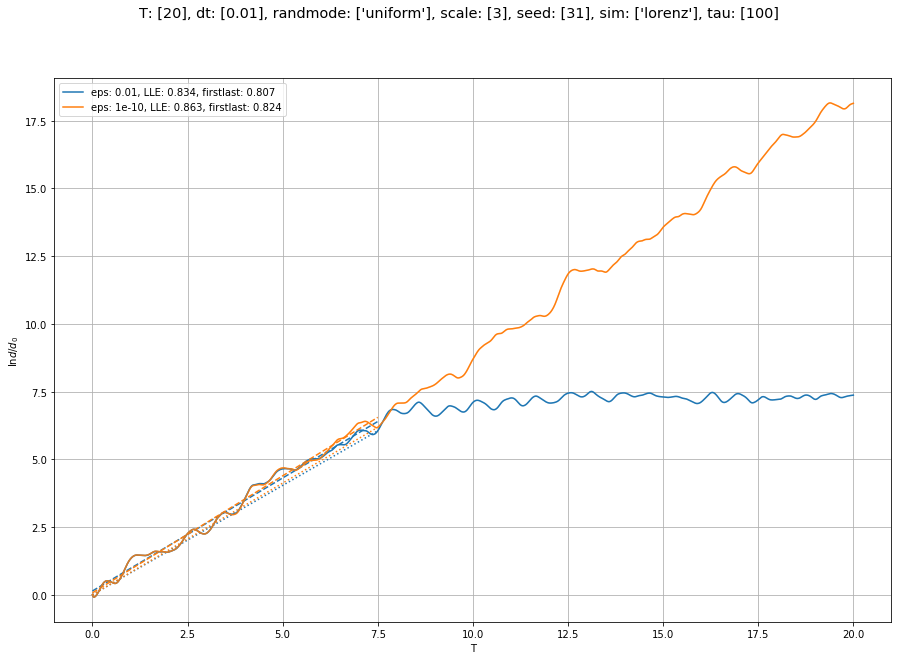

In [37]:
plot_func = simt.plot_div_file

zs = ["eps"]
xs = []
ys = []

# simt.plot_div_file kwargs
mean_axs = "all"
show_error = 0
dim_index = None
ens_index = None

include_fit = 1
t_min = 0
t_max = 7.5

include_fit_qr = 1
t_min_qr = 0
t_max_qr = 7.5

subfigsize = (15, 10)
xlims = None #(0,10)
ylims = None # (-1, 10)

simt.plot_experiment(plot_func, prepath, exp_name_div, zs=zs, xs=xs, ys=ys, subfigsize=subfigsize, xlims=xlims,
                     ylims=ylims,
                     mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index, 
                t_min=t_min, t_max=t_max, include_fit_qr=include_fit_qr, t_min_qr=t_min_qr, t_max_qr=t_max_qr)

### Plot results qr:

lines: 3, cols: 2, rows: 1
latest LEs: [0.819]
latest LEs: [0.879]
latest LEs: [0.913]
latest LEs: [0.822]
latest LEs: [0.883]
latest LEs: [0.903]


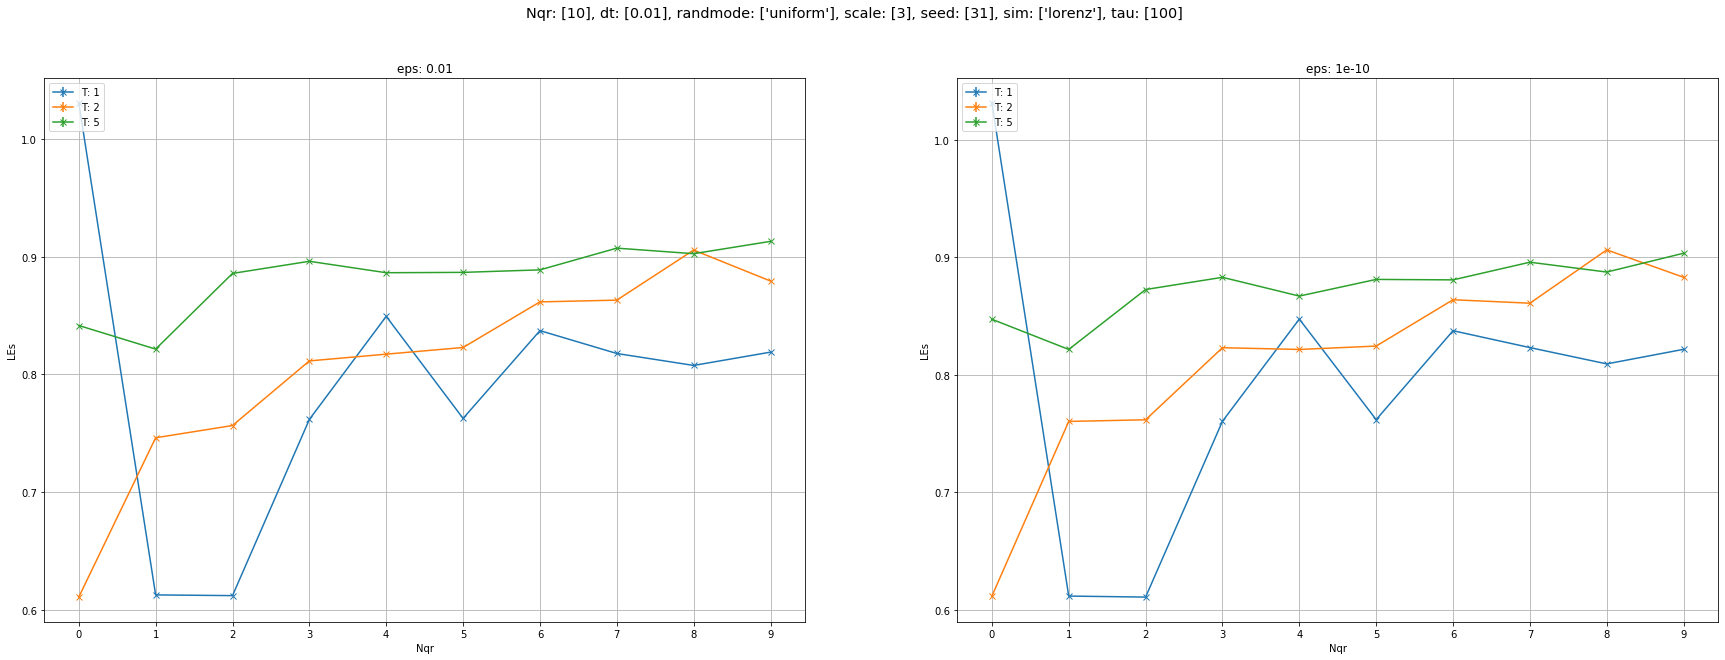

In [38]:
plot_func = simt.plot_leqr_file

zs = ["T"]
xs = ["eps"]
ys = []

# simt.plot_leqr_file kwargs
mean_axs = "ens"
show_error = 0
le_index = None
ens_index = None
every_x_tick = True
subfigsize= (15, 10)

prefix="leqr"

subfigsize = (15, 10)
simt.plot_experiment(plot_func, prepath, exp_name_qr, prefix=prefix, zs=zs, xs=xs, ys=ys, subfigsize=subfigsize, mean_axs=mean_axs, show_error=show_error,
                 le_index=le_index, ens_index=ens_index, every_x_tick=every_x_tick,
                )

### Plot results qr trajectory divergence

lines: 1, cols: 2, rows: 3


No handles with labels found to put in legend.
No handles with labels found to put in legend.


mean sloap: 0.819
mean sloap: 0.879


No handles with labels found to put in legend.
No handles with labels found to put in legend.


mean sloap: 0.913
mean sloap: 0.822


No handles with labels found to put in legend.


mean sloap: 0.883


No handles with labels found to put in legend.


mean sloap: 0.903


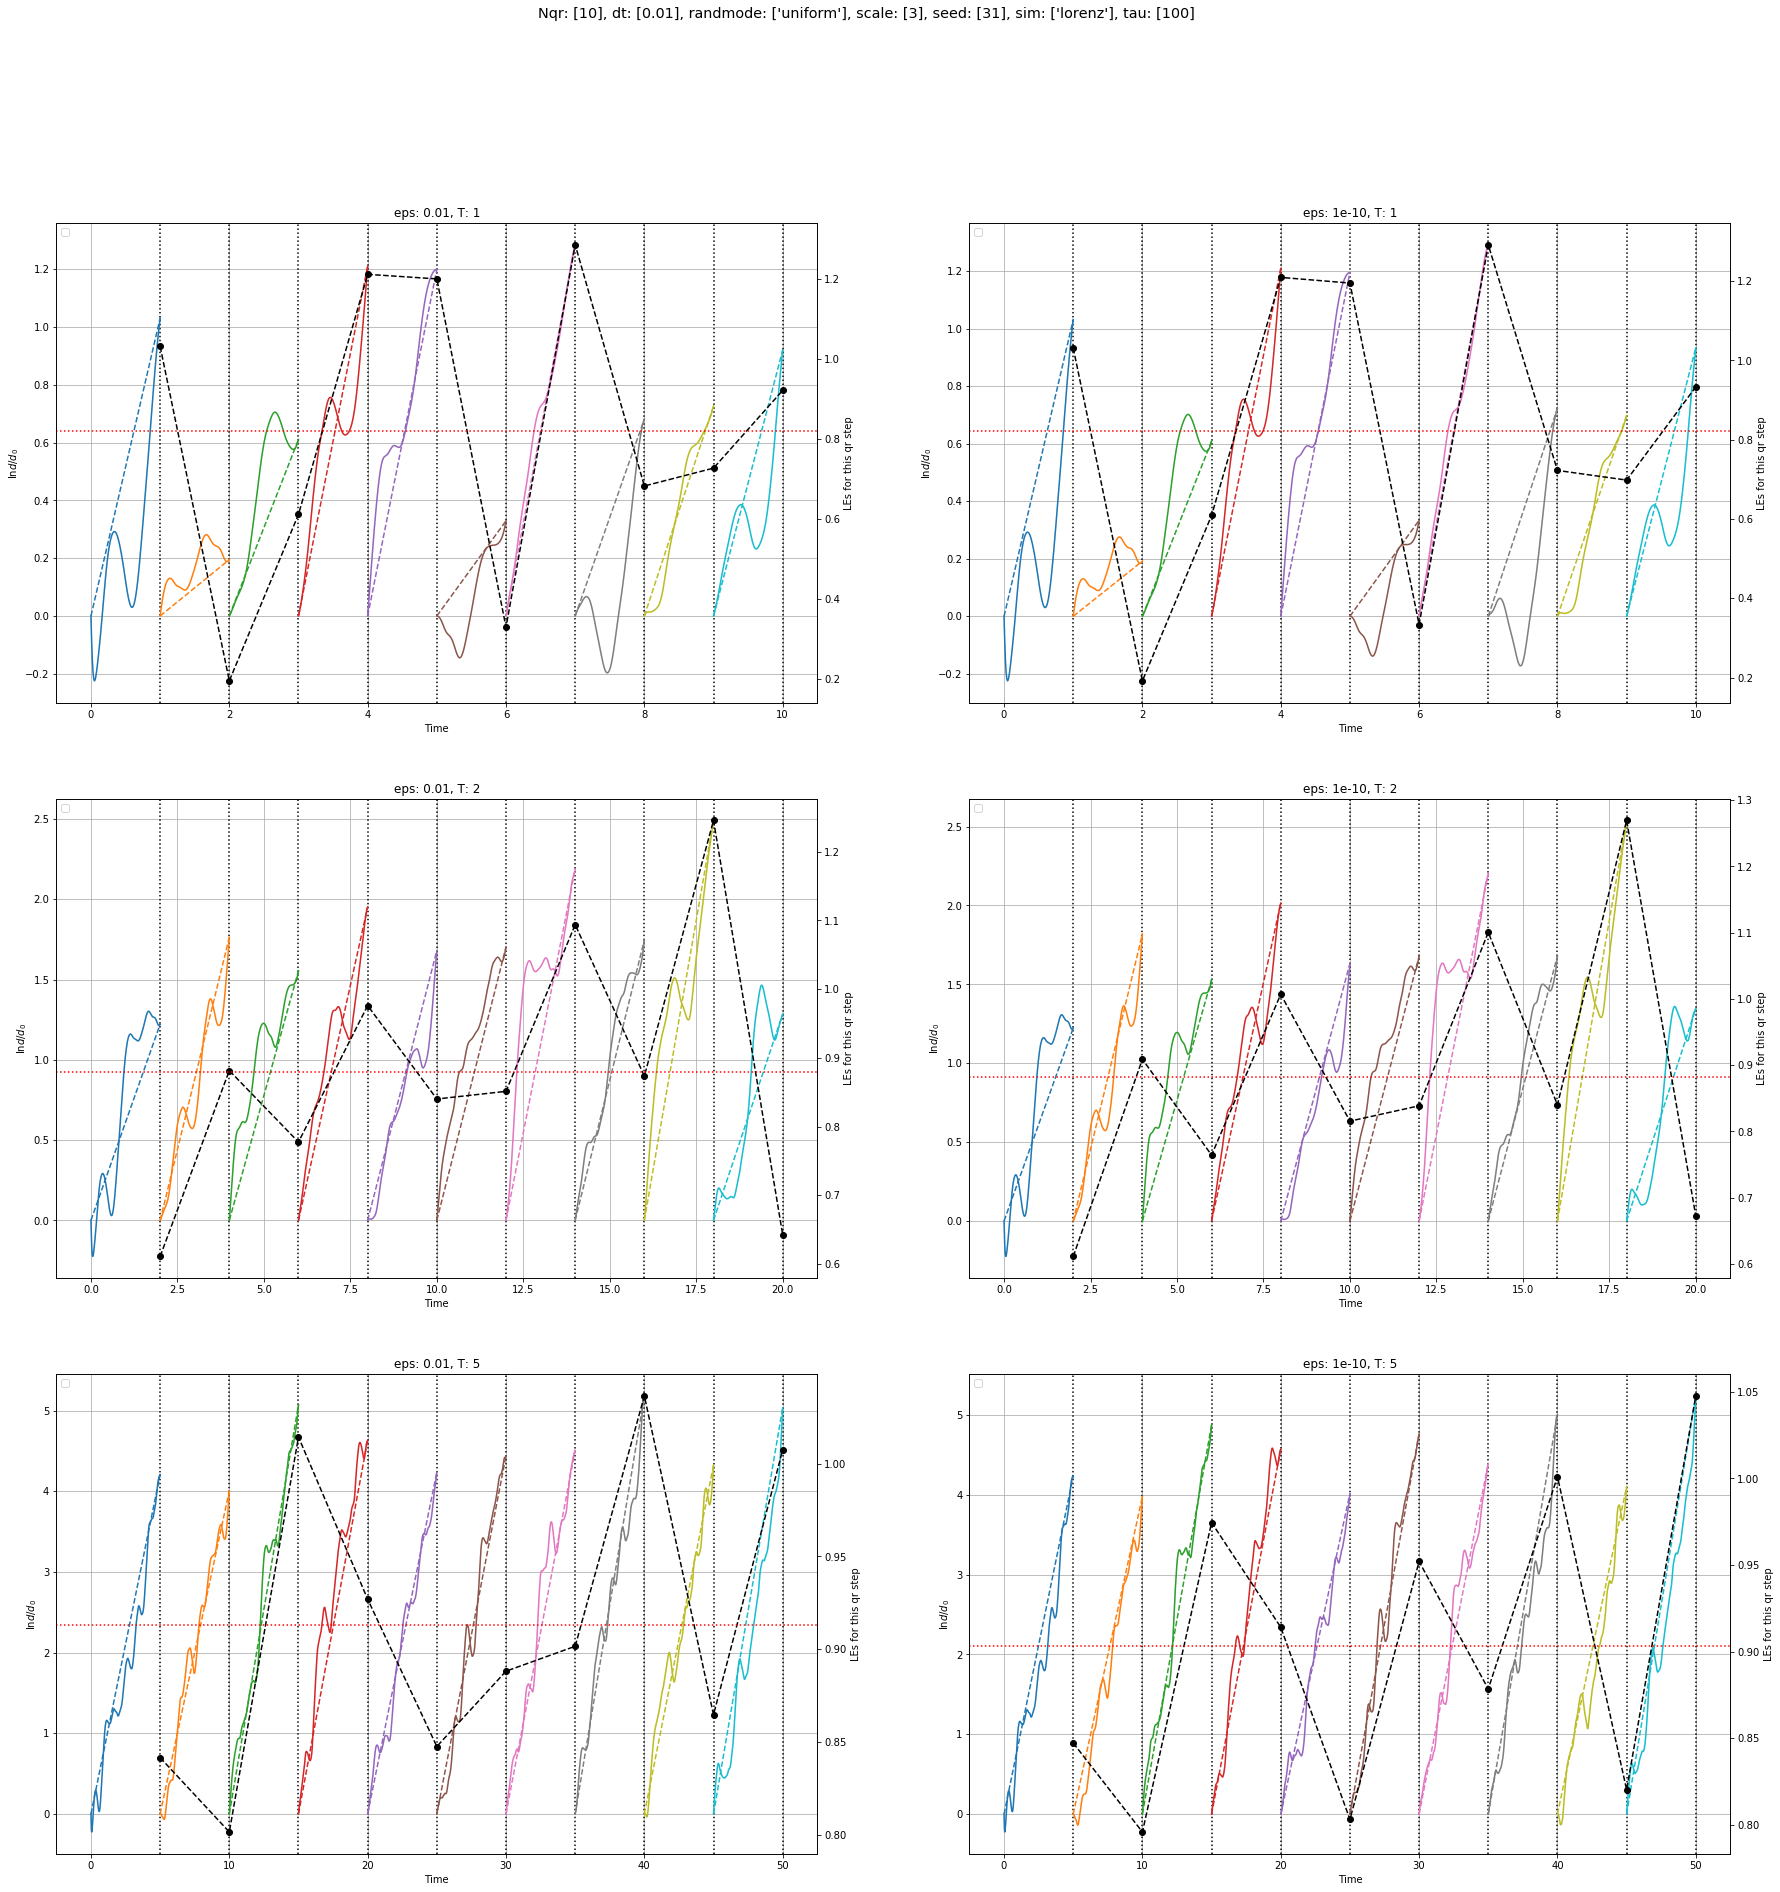

In [39]:
plot_func = simt.plot_qrdiv_file

zs = []
xs = ["eps"]
ys = ["T"]

# simt.plot_leqr_file kwargs
mean_axs = "ens"
show_error = 0
le_index = None
ens_index = None

rel_dist=True
include_fit_qr=True

subfigsize = (15, 10)
prefix="qrdiv"
ylims = None
simt.plot_experiment(plot_func, prepath, exp_name_qr, prefix=prefix,  zs=zs, xs=xs, ys=ys, ylims=ylims,
                     subfigsize=subfigsize, mean_axs=mean_axs, show_error=show_error,
                 le_index=le_index, ens_index=ens_index, rel_dist=rel_dist, include_fit_qr=include_fit_qr
                )

# Explanation:

# Not needed:

### plot single files:

In [ ]:
# plot single files: 

file_name = "qrdiv__sim_lorenz__seed_100__scale_2__randmode_uniform__dt_1p00e-02__tau_100__T_2__eps_1p00e-10__Nqr_20__Nle_1__Nens_5"
plt.figure(figsize=(15, 5))
ax = plt.gca()

mean_axs = "ens"
show_error = 0

le_index = None
ens_index = None

rel_dist=True
include_fit_qr=True

title=True

simt.plot_qrdiv_file(ax, file_name, prepath=prepath, exp_name=exp_name_qr, mean_axs=mean_axs, le_index=le_index,
                  ens_index=ens_index, show_error=show_error, title=title,
                  label="", verb=1, include_fit_qr=include_fit_qr, rel_dist=rel_dist)

# plt.xlim(0, 25)

# plt.ylim(-0.1, 0.2)

In [ ]:
# plot single files: 

file_name = "sim_lorenz__seed_100__dt_1p00e-01__tau_10__T_100__eps_1p00e-04__Ndims_1__Nens_2"

plt.figure(figsize=(15, 5))
ax = plt.gca()

include_fit = 1
mean_axs = "all"
show_error = 0

dim_index = None
ens_index = None


t_min = 0
t_max = 20

simt.plot_div_file(ax, file_name, prepath=prepath, exp_name=exp_name_div, mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index, 
                t_min=t_min, t_max=t_max)

# plt.xlim(0, 25)
ax.axvline(t_min, c="k", linestyle="--")
ax.axvline(t_max, c="k", linestyle="--")

# plt.ylim(-1, 10)

In [ ]:
# plot single files: 

file_name = "leqr__sim_lorenz__seed_100__scale_1__randmode_uniform__dt_2p00e-02__tau_100__T_1__eps_1p00e-10__Nqr_100__Nle_3__Nens_3"

plt.figure(figsize=(15, 5))
ax = plt.gca()

mean_axs = "ens"
show_error = 1

le_index = 0
ens_index = None

title=True

every_x_tick = False

simt.plot_leqr_file(ax, file_name, prepath=prepath, exp_name=exp_name_qr, mean_axs=mean_axs, le_index=le_index,
                  ens_index=ens_index, show_error=show_error, title=title,
                  label="", verb=1, every_x_tick=every_x_tick)

# plt.xlim(0, 25)

# plt.ylim(0.5, 1.0)